## Problem statement

#### To predict the propensity to buy a product based on the user's past activities and user level information.

### loading the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### loading the dataset

In [5]:
df_train=pd.read_csv('train.csv')

In [6]:
df_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [7]:
df_train.shape## checking the shape

(39161, 19)

In [8]:
df_train.dtypes ## checking the datatypes

id                        int64
created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
dtype: object

In [9]:
df_train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

## defining the function for finding the missing values

In [10]:
def missing_values(df):
    for i in df.columns:
        if df[i].isnull().sum()>0:
             print('The percentage of missing values in ' + i + ' feature is',round((df[i].isnull().sum()/len(df))*100,2))

In [11]:
missing_values(df_train)

The percentage of missing values in products_purchased feature is 53.4
The percentage of missing values in signup_date feature is 38.59


### missing value treatment

In [157]:
## imputing the null values with 0 products_purchased feature
df_train_copy=df_train.copy()
df_train_copy['products_purchased'].fillna(0,inplace=True)

In [158]:
df_train_copy['products_purchased'].isnull().sum()

0

0.0    20911
2.0     8867
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64

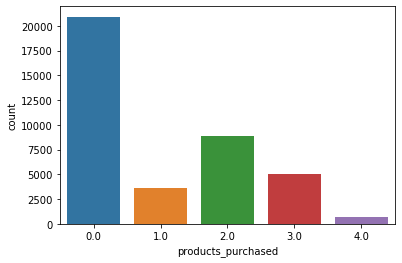

In [159]:
sns.countplot(df_train_copy['products_purchased'])
df_train_copy['products_purchased'].value_counts()

In [160]:
### extract the year,month,date from the signup_date feature
df_train_copy['signup_date']=pd.to_datetime(df_train_copy['signup_date'],format='%Y-%m-%d')
df_train_copy['year']=pd.DatetimeIndex(df_train_copy['signup_date']).year
df_train_copy['month']=pd.DatetimeIndex(df_train_copy['signup_date']).month
df_train_copy['day']=pd.DatetimeIndex(df_train_copy['signup_date']).day

In [161]:
## drop the signup_date feature
df_train_copy.drop(['signup_date'],axis=1,inplace=True)

In [162]:
### extract the year,month,date from the created_at feature
df_train_copy['created_at']=pd.to_datetime(df_train_copy['created_at'],format='%Y-%m-%d')
df_train_copy['created_at_year']=pd.DatetimeIndex(df_train_copy['created_at']).year
df_train_copy['created_at_month']=pd.DatetimeIndex(df_train_copy['created_at']).month
df_train_copy['created_at_day']=pd.DatetimeIndex(df_train_copy['created_at']).day

In [163]:
## drop the created_at feature
df_train_copy.drop(['created_at'],axis=1,inplace=True)

In [164]:
df_train_copy.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,year,month,day,created_at_year,created_at_month,created_at_day
0,1,1,2,2.0,0,0,0,0,0,0,...,0,0,0,0,2020.0,9.0,24.0,2021,1,1
1,2,2,1,2.0,1,0,1,0,0,0,...,0,0,0,0,2020.0,9.0,19.0,2021,1,1
2,3,9,3,3.0,1,0,0,0,0,0,...,0,0,0,0,2021.0,8.0,11.0,2021,1,1
3,4,6,7,2.0,0,0,0,0,0,0,...,0,0,0,0,2017.0,10.0,4.0,2021,1,1
4,5,4,6,0.0,0,0,0,0,0,0,...,0,1,0,0,2020.0,6.0,8.0,2021,1,1


In [165]:
## checking for the missing values after creating the new features
missing_values(df_train_copy)

The percentage of missing values in year feature is 38.59
The percentage of missing values in month feature is 38.59
The percentage of missing values in day feature is 38.59


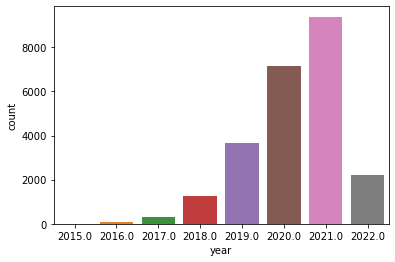

2021.0    9383
2020.0    7134
2019.0    3649
2022.0    2207
2018.0    1282
2017.0     318
2016.0      62
2015.0      13
Name: year, dtype: int64

In [166]:
sns.countplot(df_train_copy['year'])
plt.show()
df_train_copy['year'].value_counts()

In [167]:
### imputing the nullvalues using knn imputer
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=30)
df_train_copy_after_imp=imputer.fit_transform(df_train_copy)

In [169]:
df_train_copy_after_imp

array([[1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.0210e+03, 1.0000e+00,
        1.0000e+00],
       [2.0000e+00, 2.0000e+00, 1.0000e+00, ..., 2.0210e+03, 1.0000e+00,
        1.0000e+00],
       [3.0000e+00, 9.0000e+00, 3.0000e+00, ..., 2.0210e+03, 1.0000e+00,
        1.0000e+00],
       ...,
       [3.9159e+04, 8.0000e+00, 7.0000e+00, ..., 2.0210e+03, 1.2000e+01,
        3.1000e+01],
       [3.9160e+04, 7.0000e+00, 1.2000e+01, ..., 2.0210e+03, 1.2000e+01,
        3.1000e+01],
       [3.9161e+04, 2.0000e+00, 5.0000e+00, ..., 2.0210e+03, 1.2000e+01,
        3.1000e+01]])

In [170]:
## converting the numpy array into dataframe
df_train_copy_after_imp=pd.DataFrame(df_train_copy_after_imp,columns=df_train_copy.columns)
df_train_copy_after_imp.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,year,month,day,created_at_year,created_at_month,created_at_day
0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2020.0,9.0,24.0,2021.0,1.0,1.0
1,2.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2020.0,9.0,19.0,2021.0,1.0,1.0
2,3.0,9.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2021.0,8.0,11.0,2021.0,1.0,1.0
3,4.0,6.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2017.0,10.0,4.0,2021.0,1.0,1.0
4,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2020.0,6.0,8.0,2021.0,1.0,1.0


In [176]:
df_train_copy_after_imp.to_csv('df_train_copy_after_imp.csv')

In [13]:
#df_train_copy_after_imp=pd.read_csv('df_train_copy_after_imp.csv')

In [16]:
## drop the id column
#df_train_copy_after_imp.drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
df_train_copy_after_imp.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,year,month,day,created_at_year,created_at_month,created_at_day
0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2020.0,9.0,24.0,2021.0,1.0,1.0
1,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2020.0,9.0,19.0,2021.0,1.0,1.0
2,9.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2021.0,8.0,11.0,2021.0,1.0,1.0
3,6.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2017.0,10.0,4.0,2021.0,1.0,1.0
4,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,2020.0,6.0,8.0,2021.0,1.0,1.0


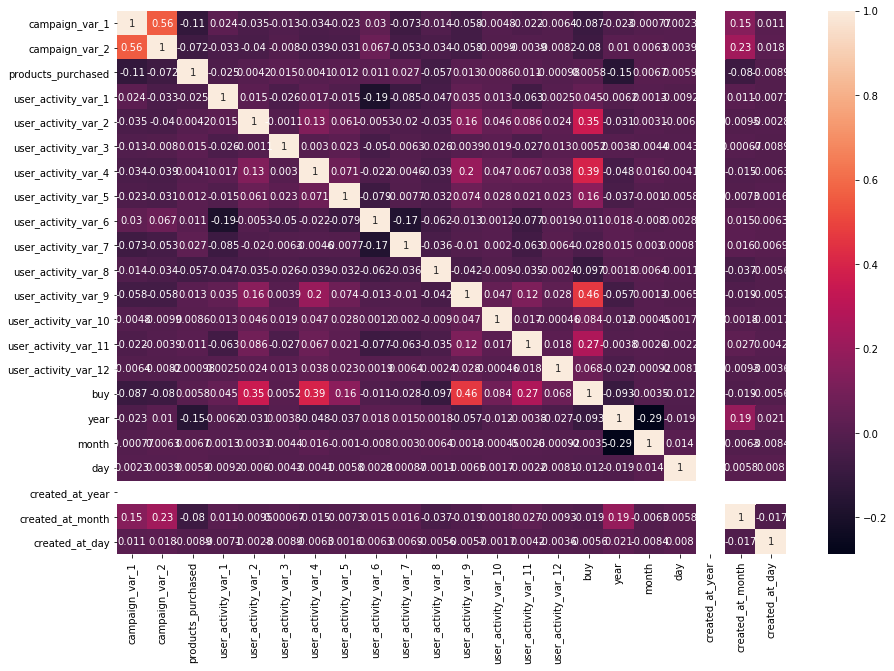

                      campaign_var_1  campaign_var_2  products_purchased  \
campaign_var_1              1.000000        0.561489           -0.114655   
campaign_var_2              0.561489        1.000000           -0.072100   
products_purchased         -0.114655       -0.072100            1.000000   
user_activity_var_1         0.024100       -0.032969           -0.025418   
user_activity_var_2        -0.034548       -0.039833            0.004166   
user_activity_var_3        -0.012670       -0.008046            0.015239   
user_activity_var_4        -0.033510       -0.038928            0.004052   
user_activity_var_5        -0.023116       -0.030990            0.012253   
user_activity_var_6         0.029665        0.067304            0.011332   
user_activity_var_7        -0.072600       -0.053462            0.026557   
user_activity_var_8        -0.014276       -0.033848           -0.056785   
user_activity_var_9        -0.058264       -0.057942            0.013268   
user_activit

In [190]:
### correlation
plt.figure(figsize=(15,10))
sns.heatmap(df_train_copy_after_imp.corr(),annot=True)
plt.show()
#print(df_train_copy_after_imp.corr())

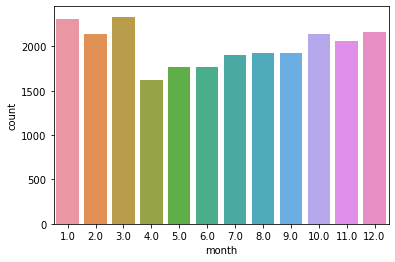

3.0     2334
1.0     2307
12.0    2157
2.0     2139
10.0    2138
11.0    2061
8.0     1928
9.0     1922
7.0     1897
6.0     1772
5.0     1769
4.0     1624
Name: month, dtype: int64

In [171]:
sns.countplot(df_train_copy['month'])
plt.show()
df_train_copy['month'].value_counts()

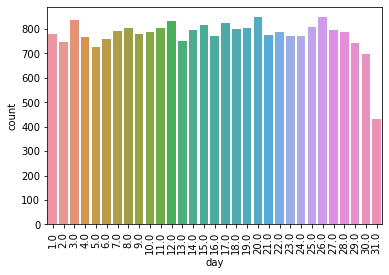

20.0    848
26.0    848
3.0     838
12.0    833
17.0    823
15.0    818
25.0    810
8.0     804
19.0    803
11.0    803
18.0    799
27.0    797
14.0    796
7.0     791
22.0    789
10.0    788
28.0    787
1.0     781
9.0     780
21.0    776
24.0    772
16.0    771
23.0    770
4.0     766
6.0     758
13.0    751
2.0     749
29.0    743
5.0     726
30.0    699
31.0    431
Name: day, dtype: int64

In [172]:
sns.countplot(df_train_copy['day'])
plt.xticks(rotation=90)
plt.show()
df_train_copy['day'].value_counts()

### descriptive statitics

In [173]:
df_train_copy=df_train.copy()## dont disturb the original dataframe

In [174]:
df_train_copy.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### EDA

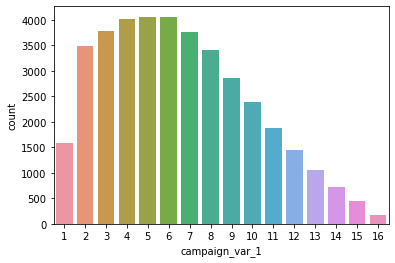

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

In [175]:
sns.countplot(df_train_copy['campaign_var_1'])
plt.show()
df_train_copy['campaign_var_1'].value_counts()

In [89]:
df_train_copy.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
year                    15113
month                   15113
day                     15113
dtype: int64

In [95]:
df_train[['created_at','signup_date']]

,created_at,signup_date
0,2021-01-01,2020-09-24
1,2021-01-01,2020-09-19
2,2021-01-01,2021-08-11
3,2021-01-01,2017-10-04
4,2021-01-01,2020-06-08
...,...,...
39156,2021-12-31,2017-10-19
39157,2021-12-31,NaN
39158,2021-12-31,NaN
39159,2021-12-31,NaN


In [18]:
### loading the test data
df_test=pd.read_csv('test.csv')
df_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [254]:
df_test.shape

(13184, 18)

In [19]:
df_test_copy=df_test.copy()

In [256]:
missing_values(df_test_copy)

The percentage of missing values in products_purchased feature is 61.71
The percentage of missing values in signup_date feature is 50.43


In [20]:

df_test_copy['products_purchased'].fillna(0,inplace=True)

In [21]:
### extract the year,month,date from the signup_date feature from the test_Data
df_test_copy['signup_date']=pd.to_datetime(df_test_copy['signup_date'],format='%Y-%m-%d')
df_test_copy['year']=pd.DatetimeIndex(df_test_copy['signup_date']).year
df_test_copy['month']=pd.DatetimeIndex(df_test_copy['signup_date']).month
df_test_copy['day']=pd.DatetimeIndex(df_test_copy['signup_date']).day

In [22]:
df_test_copy.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day
0,39162,2022-01-01,2,2,0.0,2021-08-17,1,1,0,0,...,1,0,0,0,0,1,0,2021.0,8.0,17.0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,...,0,0,1,0,0,0,0,2020.0,5.0,21.0
2,39164,2022-01-01,8,7,0.0,NaT,0,0,0,0,...,1,0,0,0,0,0,0,NaN,NaN,NaN
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,...,1,1,0,0,0,2,0,2020.0,6.0,22.0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,...,0,0,0,0,0,0,0,2021.0,3.0,10.0


In [23]:
## drop the signup_date feature
df_test_copy.drop(['signup_date'],axis=1,inplace=True)

In [24]:
### extract the year,month,date from the created_at feature
df_test_copy['created_at']=pd.to_datetime(df_test_copy['created_at'],format='%Y-%m-%d')
df_test_copy['created_at_year']=pd.DatetimeIndex(df_test_copy['created_at']).year
df_test_copy['created_at_month']=pd.DatetimeIndex(df_test_copy['created_at']).month
df_test_copy['created_at_day']=pd.DatetimeIndex(df_test_copy['created_at']).day

In [25]:
## drop the created_at feature
df_test_copy.drop(['created_at'],axis=1,inplace=True)

In [26]:
df_test_copy.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,created_at_year,created_at_month,created_at_day
0,39162,2,2,0.0,1,1,0,0,0,1,...,0,0,1,0,2021.0,8.0,17.0,2022,1,1
1,39163,4,7,3.0,1,0,0,0,0,0,...,0,0,0,0,2020.0,5.0,21.0,2022,1,1
2,39164,8,7,0.0,0,0,0,0,1,1,...,0,0,0,0,NaN,NaN,NaN,2022,1,1
3,39165,9,8,2.0,0,0,0,0,1,1,...,0,0,2,0,2020.0,6.0,22.0,2022,1,1
4,39166,4,5,2.0,1,0,0,0,0,0,...,0,0,0,0,2021.0,3.0,10.0,2022,1,1


In [299]:
df_test_copy.isnull().sum()

id                         0
campaign_var_1             0
campaign_var_2             0
products_purchased         0
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
year                    6649
month                   6649
day                     6649
created_at_year            0
created_at_month           0
created_at_day             0
dtype: int64

In [300]:
### imputing the nullvalues using knn imputer for test_data
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=30)
df_test_copy_after_imp=imputer.fit_transform(df_test_copy)

In [308]:
df_test_copy_after_imp=pd.DataFrame(df_test_copy_after_imp,columns=df_test_copy.columns[0:22])
df_test_copy_after_imp.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,created_at_year,created_at_month,created_at_day
0,39162.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,2021.0,8.0,17.0,2022.0,1.0,1.0
1,39163.0,4.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2020.0,5.0,21.0,2022.0,1.0,1.0
2,39164.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2020.4,6.5,17.3,2022.0,1.0,1.0
3,39165.0,9.0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,0.0,2020.0,6.0,22.0,2022.0,1.0,1.0
4,39166.0,4.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2021.0,3.0,10.0,2022.0,1.0,1.0


In [266]:
df_test_copy_after_imp.shape

(13184, 22)

In [309]:
df_test_copy_after_imp.to_csv('df_test_copy_after_imp.csv')

In [28]:
#df_test_copy_after_imp=pd.read_csv('df_test_copy_after_imp.csv')

In [29]:
## drop the id column
df_test_copy_after_imp.drop(columns=['id'],inplace=True)

In [31]:
df_test_copy_after_imp.head()

,Unnamed: 0,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,created_at_year,created_at_month,created_at_day
0,0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,2021.0,8.0,17.0,2022.0,1.0,1.0
1,1,4.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2020.0,5.0,21.0,2022.0,1.0,1.0
2,2,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2020.4,6.5,17.3,2022.0,1.0,1.0
3,3,9.0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,0.0,2020.0,6.0,22.0,2022.0,1.0,1.0
4,4,4.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2021.0,3.0,10.0,2022.0,1.0,1.0


In [32]:
## drop the id column
#df_test_copy_after_imp.drop(columns=['Unnamed: 0'],inplace=True)

In [33]:
df_test_copy_after_imp.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,year,month,day,created_at_year,created_at_month,created_at_day
0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,2021.0,8.0,17.0,2022.0,1.0,1.0
1,4.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2020.0,5.0,21.0,2022.0,1.0,1.0
2,8.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2020.4,6.5,17.3,2022.0,1.0,1.0
3,9.0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,2.0,0.0,2020.0,6.0,22.0,2022.0,1.0,1.0
4,4.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2021.0,3.0,10.0,2022.0,1.0,1.0


#### building the logistic_regression_model

In [269]:
df_train_copy_after_imp.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'year', 'month', 'day', 'created_at_year', 'created_at_month',
       'created_at_day'],
      dtype='object')

In [34]:
## seperating the independent variables and dependent variables
x=df_train_copy_after_imp.drop(['buy'],axis=1)
y=df_train_copy_after_imp['buy']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=log_reg.predict(x_test)

In [315]:
from sklearn.metrics import confusion_matrix,f1_score

In [316]:
confusion_matrix(y_test,y_pred)

array([[11144,    51],
       [  414,   140]], dtype=int64)

In [317]:
y_pred=pd.DataFrame(y_pred)

In [44]:
df_sample=pd.read_csv('sample_submission.csv')

In [45]:
df_sample3=df_sample['id']

In [46]:
df_sample3=pd.DataFrame(df_sample3)
df_sample3['buy']=pd.DataFrame(y_pred)

In [47]:
df_sample3.head()

,id,buy
0,39162,0.0
1,39163,0.0
2,39164,0.0
3,39165,0.0
4,39166,0.0


In [321]:
df_sample3.to_csv('submission3.csv',index=False)

In [322]:
df_sample.shape

(13184, 2)

In [295]:
df_sample3.shape

(13184, 2)

In [323]:
df_sample3.isnull().sum()

id        0
buy    1435
dtype: int64

In [298]:
df_sample3['buy'].value_counts()

0.0    11699
1.0       50
Name: buy, dtype: int64

In [41]:
### submission_file
y_pred_sub=log_reg.predict(df_test_copy_after_imp)

In [325]:
y_pred_sub

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
y_pred_sub=pd.DataFrame(y_pred_sub)
df_sample_sub=df_sample['id']
df_sample_sub=pd.DataFrame(df_sample_sub)
df_sample_sub['buy']=pd.DataFrame(y_pred_sub)
df_sample_sub.head()

,id,buy
0,39162,0.0
1,39163,0.0
2,39164,0.0
3,39165,0.0
4,39166,0.0


In [330]:
df_sample_sub.to_csv('submission4.csv',index=False)

In [331]:
df_sample_sub.isnull().sum()

id     0
buy    0
dtype: int64

In [332]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972701 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972701 (0.002280) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.954703 (0.002459) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.971436 (0.002521) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.972628 (0.002291) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955214 (0.002909) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.972044 (0.002465) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.972299 (0.002270) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.954691 (0.002645) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.971606 (0.002300) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.969904 (0.002035) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.954752 (0.002306) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.969271 (0.002101) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.956260 (0.001483) wit

In [335]:
log_reg_hp=LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')

In [337]:
log_reg_hp.fit(x_train,y_train)
y_pred_hp=log_reg_hp.predict(df_test_copy_after_imp)

In [339]:
y_pred_log_hp=pd.DataFrame(y_pred_hp)
df_sample_log_hp=df_sample['id']
df_sample_log_hp=pd.DataFrame(df_sample_log_hp)
df_sample_log_hp['buy']=pd.DataFrame(y_pred_log_hp)
df_sample_log_hp.head()

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0


In [340]:
df_sample_log_hp.to_csv('submission5_log_hp.csv',index=False)

### Ridge Classifier

In [341]:
# example of grid searching key hyperparametres for ridge classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969831 using {'alpha': 0.1}
0.969831 (0.001785) with: {'alpha': 0.1}
0.969831 (0.001785) with: {'alpha': 0.2}
0.969806 (0.001809) with: {'alpha': 0.3}
0.969806 (0.001809) with: {'alpha': 0.4}
0.969806 (0.001809) with: {'alpha': 0.5}
0.969806 (0.001809) with: {'alpha': 0.6}
0.969794 (0.001803) with: {'alpha': 0.7}
0.969794 (0.001803) with: {'alpha': 0.8}
0.969794 (0.001803) with: {'alpha': 0.9}
0.969794 (0.001803) with: {'alpha': 1.0}


In [343]:
ridge_classifier=RidgeClassifier(alpha = 0.1)
ridge_classifier.fit(x_train,y_train)

RidgeClassifier(alpha=0.1)

In [344]:
y_pred_ridge_hp=ridge_classifier.predict(df_test_copy_after_imp)

In [345]:
y_pred_ridge_hp=pd.DataFrame(y_pred_ridge_hp)
df_sample_ridge_hp=df_sample['id']
df_sample_ridge_hp=pd.DataFrame(df_sample_ridge_hp)
df_sample_ridge_hp['buy']=pd.DataFrame(y_pred_ridge_hp)
df_sample_ridge_hp.head()

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,0.0
4,39166,0.0


In [346]:
df_sample_ridge_hp.to_csv('submission6_ridge_hp.csv',index=False)

### knn

In [347]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.947335 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.922260 (0.003256) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.922260 (0.003256) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.942543 (0.001689) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.942543 (0.001689) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.946374 (0.000735) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.946374 (0.000735) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.947043 (0.000497) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.947043 (0.000497) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.947201 (0.000349) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.947189 (0.000370) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.947274 (

In [348]:
from sklearn.neighbors import KNeighborsClassifier  
knn_classifier_hp= KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform' )  
knn_classifier_hp.fit(x_train, y_train)  

KNeighborsClassifier(metric='manhattan')

In [349]:
y_pred_knn_hp=knn_classifier_hp.predict(df_test_copy_after_imp)

In [350]:
y_pred_knn_hp=pd.DataFrame(y_pred_knn_hp)
df_sample_knn_hp=df_sample['id']
df_sample_knn_hp=pd.DataFrame(df_sample_knn_hp)
df_sample_knn_hp['buy']=pd.DataFrame(y_pred_knn_hp)
df_sample_knn_hp.head()

,id,buy
0,39162,0.0
1,39163,0.0
2,39164,0.0
3,39165,0.0
4,39166,0.0


In [351]:
df_sample_knn_hp.to_csv('submission7_knn_hp.csv',index=False)

## f1_score for knn 0.09
## f1_score for ridge 0.53
## f1_score for log_hp 0.70

# Support Vector Machine (SVM)

In [353]:
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.947322 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.947322 (0.000174) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.947322 (0.000174) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.947322 (0.000174) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.947322 (0.000174) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.947322 (0.000174) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.947322 (0.000174) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.947322 (0.000174) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.947322 (0.000174) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.947322 (0.000174) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.947322 (0.000174) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.947322 (0.000174) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.947322 (0.000174) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.947322 (0.000174) with: {'C': 0.01, 'gamma': 'scale',

In [356]:
svm_hp=SVC(C= 50, gamma= 'scale', kernel= 'poly')

In [357]:
svm_hp.fit(x_train,y_train)

SVC(C=50, kernel='poly')

In [358]:
y_pred_svm_hp=svm_hp.predict(df_test_copy_after_imp)

In [359]:
y_pred_svm_hp=pd.DataFrame(y_pred_svm_hp)
df_sample_svm_hp=df_sample['id']
df_sample_svm_hp=pd.DataFrame(df_sample_svm_hp)
df_sample_svm_hp['buy']=pd.DataFrame(y_pred_svm_hp)
df_sample_svm_hp.head()

,id,buy
0,39162,0.0
1,39163,0.0
2,39164,0.0
3,39165,0.0
4,39166,0.0


In [360]:
df_sample_svm_hp.to_csv('submission8_svm_hp.csv',index=False)

# Bagged Decision Trees (Bagging)


In [361]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.973527 using {'n_estimators': 1000}
0.972251 (0.002183) with: {'n_estimators': 10}
0.973308 (0.002352) with: {'n_estimators': 100}
0.973527 (0.002481) with: {'n_estimators': 1000}


In [371]:
 from sklearn.tree import DecisionTreeClassifier
bag_classifier_hp=BaggingClassifier(base_estimator= DecisionTreeClassifier(),n_estimators=1000)

In [372]:
bag_classifier_hp.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)

In [373]:
y_pred_bag_hp=bag_classifier_hp.predict(df_test_copy_after_imp)

In [374]:
y_pred_bag_hp=pd.DataFrame(y_pred_bag_hp)
df_sample_bag_hp=df_sample['id']
df_sample_bag_hp=pd.DataFrame(df_sample_bag_hp)
df_sample_bag_hp['buy']=pd.DataFrame(y_pred_bag_hp)
df_sample_bag_hp.head()

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0


In [375]:
df_sample_bag_hp.to_csv('submission9_bag_hp.csv',index=False)

# Bagged Decision Trees (Bagging)(svm)

In [376]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.973479 using {'n_estimators': 1000}
0.972141 (0.002546) with: {'n_estimators': 10}
0.973199 (0.002506) with: {'n_estimators': 100}
0.973479 (0.002477) with: {'n_estimators': 1000}


In [377]:
bag_classifier_svm_hp=BaggingClassifier(n_estimators=1000)

In [378]:
bag_classifier_svm_hp.fit(x_train,y_train)

BaggingClassifier(n_estimators=1000)

In [379]:
y_pred_bag_svm_hp=bag_classifier_svm_hp.predict(df_test_copy_after_imp)

In [380]:
y_pred_bag_svm_hp=pd.DataFrame(y_pred_bag_svm_hp)
df_sample_bag_svm_hp=df_sample['id']
df_sample_bag_svm_hp=pd.DataFrame(df_sample_bag_svm_hp)
df_sample_bag_svm_hp['buy']=pd.DataFrame(y_pred_bag_svm_hp)
df_sample_bag_svm_hp.head()

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0


In [381]:
df_sample_bag_svm_hp.to_csv('submission10_bag_svm_hp.csv',index=False)

## Random Forest

In [382]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.973904 using {'max_features': 'log2', 'n_estimators': 100}
0.973077 (0.002331) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.973673 (0.002331) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.973722 (0.002232) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.972944 (0.002487) with: {'max_features': 'log2', 'n_estimators': 10}
0.973904 (0.002319) with: {'max_features': 'log2', 'n_estimators': 100}
0.973758 (0.002235) with: {'max_features': 'log2', 'n_estimators': 1000}


In [383]:
from sklearn.ensemble import RandomForestClassifier

In [384]:
ran_forest_classifier_hp=RandomForestClassifier(n_estimators=100,max_features= 'log2')

In [385]:
ran_forest_classifier_hp.fit(x_train,y_train)

RandomForestClassifier(max_features='log2')

In [386]:
y_pred_ran_forest_hp=ran_forest_classifier_hp.predict(df_test_copy_after_imp)

In [387]:
y_pred_ran_forest_hp=pd.DataFrame(y_pred_ran_forest_hp)
df_sample_ran_forest_hp=df_sample['id']
df_sample_ran_forest_hp=pd.DataFrame(df_sample_ran_forest_hp)
df_sample_ran_forest_hp['buy']=pd.DataFrame(y_pred_ran_forest_hp)
df_sample_ran_forest_hp.head()

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0


In [388]:
df_sample_ran_forest_hp.to_csv('submission11_ran_forest_hp.csv',index=False)

## Stochastic Gradient Boosting

In [ ]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gradient_boost_classifier_hp=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,subsample=0.5,max_depth=9)

In [92]:
gradient_boost_classifier_hp.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=1000,
                           subsample=0.5)

In [88]:
y_pred_gradient_boost_classifier_hp=gradient_boost_classifier_hp.predict(df_test_copy_after_imp)

In [89]:
y_pred_gradient_boost_classifier_hp=pd.DataFrame(y_pred_gradient_boost_classifier_hp)
df_sample_gradient_boost_classifier_hp=df_sample['id']
df_sample_gradient_boost_classifier_hp=pd.DataFrame(df_sample_gradient_boost_classifier_hp)
df_sample_gradient_boost_classifier_hp['buy']=pd.DataFrame(y_pred_gradient_boost_classifier_hp)
df_sample_gradient_boost_classifier_hp.head()

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0


In [90]:
df_sample_gradient_boost_classifier_hp.to_csv('submission12_gradient_boost_classifier_hp.csv',index=False)